In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("heart.csv")

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [26]:
df.isnull().sum()

age          0
sex          0
trestbps     0
chol         0
fbs          0
thalach      0
exang        0
oldpeak      0
ca           0
target       0
cp_1         0
cp_2         0
cp_3         0
restecg_1    0
restecg_2    0
slope_1      0
slope_2      0
thal_1       0
thal_2       0
thal_3       0
dtype: int64

In [27]:
x=df.drop("target",axis=1)
y=df["target"]

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [34]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=6)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [35]:
y_pred=model.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))

0.926829268292683


In [37]:
print(confusion_matrix(y_test, y_pred))

[[91 12]
 [ 3 99]]


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       103
           1       0.89      0.97      0.93       102

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



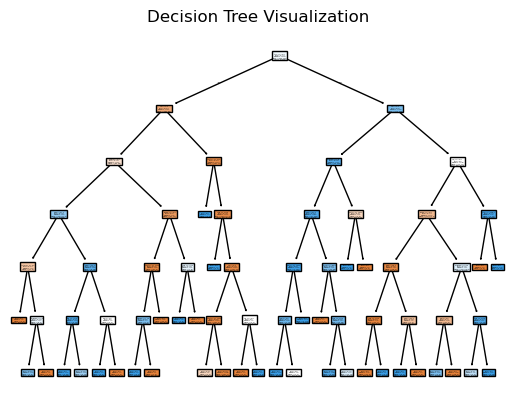

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(model, filled=True, feature_names=x.columns, class_names=["No Disease", "Disease"])
plt.title("Decision Tree Visualization")
plt.show()


In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train, y_train)


RandomForestClassifier()

In [42]:
y_pred = rf_model.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


1.0
[[103   0]
 [  0 102]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       102

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [45]:
feature_importances = rf_model.feature_importances_
features = x.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

      Feature  Importance
8          ca    0.130924
5     thalach    0.117024
17     thal_2    0.109949
7     oldpeak    0.098926
0         age    0.080502
3        chol    0.077292
2    trestbps    0.070796
6       exang    0.062104
18     thal_3    0.049157
10       cp_2    0.041307
15    slope_2    0.036954
1         sex    0.029651
14    slope_1    0.026208
11       cp_3    0.022104
12  restecg_1    0.018976
9        cp_1    0.013656
4         fbs    0.009410
16     thal_1    0.004002
13  restecg_2    0.001059


In [47]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, x, y, cv=5)

print("Cross-validation scores for each fold:", cv_scores)
print("Average cross-validation accuracy:", cv_scores.mean())


Cross-validation scores for each fold: [1.         1.         1.         1.         0.98536585]
Average cross-validation accuracy: 0.9970731707317073
